### Créer sa propre couche layer avec Keras

1) En deep learning on utilise généralement des Layers tout fait,     
cependant il peut être intéressant de définir son propre layer répondant à des besoins particuliers, 
layer que vous pourrez réutiliser pour d'autres models.

2) le point fort de cette technologie Keras, votre class Layer bénéficiera des fonctionalités de la class Layer Keras 

3) autre point fort, la réutilisation d'un composant layer personalisé



In [2]:
from IPython.display import Image
import numpy as np

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from sklearn.model_selection import train_test_split


###### Dans l'exemple qui suit, nous créons une couche dense complètement connectée, la class comporte quatre méthodes:
  
-**init**(): pour définir les tailles des données en entrée et sortie du Layer    
-**build** : pour construire la matrice de poids (kernel)     
-**call()**: traitement proprement dit du layer, la boite à outils Backend est utilisée pour mes opérations matricielles   
-**compute_output_shape()**: simple méthode pour calculer le format de sortie de la couche       


In [6]:
class MonComposant(Layer):
    '''ma class layer personalisée '''
    def __init__(self, output_dim, **kwargs):
        ''' initialisation, avec les dimensions d'entrée et sortie '''
        self.output_dim = output_dim
        super(MonComposant, self).__init__(**kwargs)
        
    def build(self, input_shape):
        ''' construction/définition des poids du layer '''        
        self.kernel = self.add_weight(name='kernel', shape=(input_shape[1], self.output_dim), initializer='normal', trainable=True)
        super(MonComposant, self).build(input_shape)
        
    def call(self, input_data):
        ''' traitement proprement dit du layer '''
        ''' renvoie le produit des matrices input_data et  kernel
            A(m,n) x B(n,p) = C(m,p) 
        '''
        
        return K.dot(input_data, self.kernel)
    
    def compute_output_shape(self, input_shape):
        ''' calcul du format de sortie de la couche '''          
        return (input_shape[0], self.output_dim)
   

- nous allons tester la class de notre layer 

In [8]:
def creation_model():
    ''' création du model '''
    model = Sequential()
    
    model.add(Input(shape=(8,)))
    model.add(MonComposant(64, input_shape=(8,), name='mylayer')) # 'mylayer' sera le nom de notre couche cachée
    model.add(Activation('relu'))    
    model.add(Dropout(0.15))
    model.add(MonComposant(1, input_shape=(64,)))
    model.add(Activation('sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # tf.keras.utils.plot_model(model, to_file='MonComposant.png', show_shapes=True)
    return model

    
def test_MonComposant(model):
    ''' entrainement et test du model '''
    # dataset https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv
    dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
    X = dataset[:,0:8]
    Y = dataset[:,8]
    print(X.shape, Y.shape)
    # input_dim = X.shape[1]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    
    model.summary()

    print()
    print('Analyse de la couche cachée "mylayer"')
    mylayer = model.get_layer('mylayer')
    print('-\tmylayer.kernel.shape:  ', mylayer.kernel.shape)
    print('-\tcompute_output_shape():', mylayer.compute_output_shape((8,)))
    print()
            
    # fit the network
    print('- Entrainement du model')
    history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
    # evaluate the network
    loss, accuracy = model.evaluate(X_train, y_train)
    print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
    probabilities = model.predict(X_test)    
    predictions = [float(np.round(p)) for p in probabilities]
    accuracy = np.mean(predictions == y_test)
    print("Prediction Accuracy: %.2f%%" % (accuracy*100))



- Créons et testons notre model

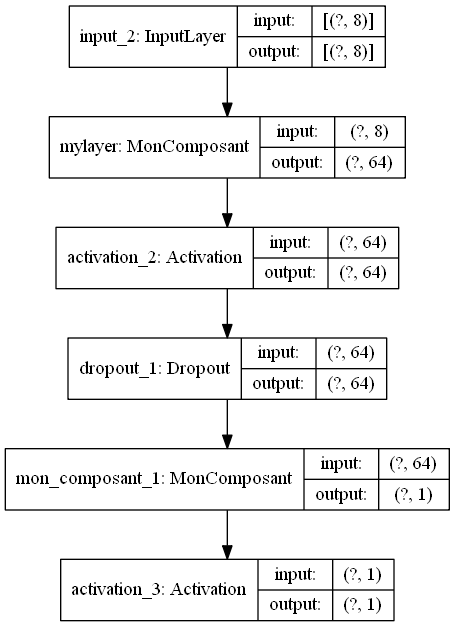

In [10]:
model = creation_model()

Image(filename='MonComposant.png') 


- entrainement et test du model

In [11]:
test_MonComposant(model)    

(768, 8) (768,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mylayer (MonComposant)       (None, 64)                512       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
mon_composant_2 (MonComposan (None, 1)                 64        
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________

Analyse de la couche cachée "mylayer"
-	mylayer.kernel.shape:   (8, 64)
-	compute_output_shape(): (8, 64)